In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
bike = pd.read_csv('../Datasets/bikesharing.csv')

In [11]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [13]:
X = bike.drop('cnt', axis=1).values
y= bike['cnt'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [16]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

In [19]:
params1= {'max_depth': 3, 'objective': 'reg:linear', 'colsample_bytree': 0.6, 'learning_rate': 0.2, 'labmda': 2}

In [23]:
model1 = xgb.train(dtrain=DM_train, params= params1, num_boost_round= 70)

[11:10:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "labmda" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [48]:
model2 = xgb.XGBRegressor(objective='reg:linear', max_depth= 3,  colsample_bytree=0.6,n_estimators= 115)

In [49]:
model2.fit(X_train,y_train)

[11:40:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=115, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [50]:
imp1 = model2.feature_importances_.argsort()[::-1]

In [56]:
imp1

array([ 0,  2,  3, 11,  4,  9,  6,  5,  1, 10,  7,  8], dtype=int64)

In [ ]:
plt.barh(X_train[imp1])

In [72]:
plot = bike.drop('cnt', axis=1).columns
plot

Index(['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty'],
      dtype='object')

<BarContainer object of 12 artists>

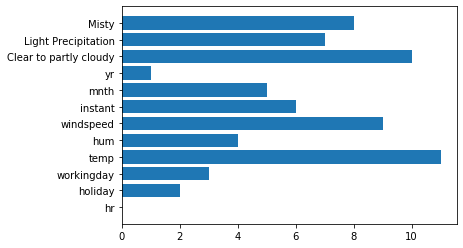

In [75]:
plt.barh(plot, imp1)

In [25]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [126]:
params2= {'objective' :'reg:linear', 'max_depth':5 , 'colsample_bytree': 0.95}

In [119]:
cols = [0.0001,0.001,0.01,0.1,0.2,0.65,0.7,0.8,0.85,0.9, 0.95, 1]
res2= []

In [120]:
for f in cols:
    params2['colsample_bytree'] = f
    cv2 = xgb.cv(dtrain=DM_train, params=params2, nfold=3, metrics='rmse', num_boost_round=80, early_stopping_rounds=5)
    res2.append(cv2['test-rmse-mean'].tail().values[0])

[14:37:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: could not convert string to float: '-nan(ind)'

In [121]:
print(pd.DataFrame(list(zip(cols, res2)), columns= ['cols', 'rmse']))


Empty DataFrame
Columns: [cols, rmse]
Index: []


In [130]:
learning_rates= [0.001,0.01,0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,1000000000000000000000000,1000,100]
res3 = []

In [131]:
for f in learning_rates:
    params2['learning_rate'] = f
    cv3 = xgb.cv(dtrain=DM_train, params=params2, num_boost_round=115, early_stopping_rounds=5, as_pandas=True, nfold=4, metrics='rmse')
    res3.append(cv3['test-rmse-mean'].tail().values[0])

[14:39:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

ValueError: could not convert string to float: '-nan(ind)'

In [132]:
print(pd.DataFrame(list(zip(learning_rates, res3)), columns=['eta', 'rmse']))

     eta        rmse
0  0.001  316.941434
1  0.010  142.401575
2  0.100   54.627143
3  0.200   53.686163
4  0.300   53.958162
5  0.400   53.033906
6  0.500   55.128300
7  0.600   56.910522
8  0.700   59.970651
9  0.800   62.312896


In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [199]:
params4 = {'learning_rate': [0.1], 'colsample_bynode': 0.9, 'subsample': [0.9], 'n_estimators': [50], 'lambda': [0.5], 'max_depth': [7]}

In [193]:
model4 = xgb.XGBRegressor()

In [194]:
grid_mse = GridSearchCV(estimator=model4, param_grid= params4, cv=5, scoring='neg_mean_squared_error')

In [195]:
grid_mse.fit(X_train,y_train)

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learnin...
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    predictor=None, random_state=None,
                                    reg_alpha=None, ...),
             iid='warn', 

In [196]:
grid_mse.best_params_

{'colsample_bynode': 0.9,
 'lambda': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.9}

In [197]:
(-grid_mse.best_score_)**0.5

52.784570652947515

In [203]:
params5 = {'learning_rate': 0.1, 'colsample_bynode': 0.9, 'subsample': 0.9,  'lambda': 0.5, 'max_depth': 7}

In [204]:
cv4 = xgb.cv(dtrain=DM_train, params= params5, num_boost_round=150, early_stopping_rounds = 7, nfold=4, metrics='rmse', as_pandas=True )

In [205]:
cv4['test-rmse-mean'].tail().values[0]

53.57659721254698

In [211]:
seeds = pd.read_csv('../Datasets/seeds.csv')

In [268]:
seeds.label.value_c

,eis,zwei,drü,e,f,fe,fd,label
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [269]:
seeds.label.value_counts()

3    70
2    70
1    69
Name: label, dtype: int64

In [214]:
seeds.columns = ['eis', 'zwei', 'drü', 'e', 'f', 'fe', 'fd', 'label']

In [297]:
X2 = seeds.drop('label', axis=1).values
y2 = seeds['label'].values

In [298]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.25)

In [279]:
from sklearn.preprocessing import LabelEncoder

In [286]:
le = LabelEncoder()

In [307]:
y2_train = le.fit_transform(y2_train)

In [308]:
y2_test = le.transform(y2_test)

In [309]:
y2_test

array([0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2,
       1, 0, 2, 1, 0, 0, 1, 1, 0], dtype=int64)

In [292]:
DM2_train = xgb.DMatrix(data= X2_train, label=y2_train)
DM2_test= xgb.DMatrix(data= X2_test, label=y2_test)

In [359]:
params4= {'objective': ['reg:logistic'], 'learning_rate':[0.2], 'max_depth': [4], 'lambda': [10], 'n_estimators': [50], 'colsample_bytree': [0.8], 'gamma': [0.1]}

In [360]:
model4 = xgb.XGBClassifier()

In [361]:
cv5 = GridSearchCV(estimator=model4, param_grid=params4, cv=4, verbose=1)

In [362]:
cv5.fit(X2_train,y2_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learni...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, ...),
             iid='warn', n

In [367]:
cv5.best_score_

0.9166666666666666

In [366]:
cv5.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'lambda': 10,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 50,
 'objective': 'reg:logistic'}

In [369]:
model5 = cv5.best_estimator_

In [371]:
model5.fit(X2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=10,
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)